# COSMO:
This notebook gives some examples to illustrate ou to use the `cosmo` module of the `cascapy`package.

## Import the `cosmo` module

In [1]:
from cascapy.cosmo import *
from cascapy.constants import Mpc,year,Gpc,kpc
import numpy as np
import matplotlib.pyplot as plt

## Comoving distances

In [2]:
c = LCDM()
z = 1.3
print(f"At z={z}, Dc={c.dc_z(z)/Mpc:.2e} Mpc")

At z=1.3, Dc=4.05e+03 Mpc


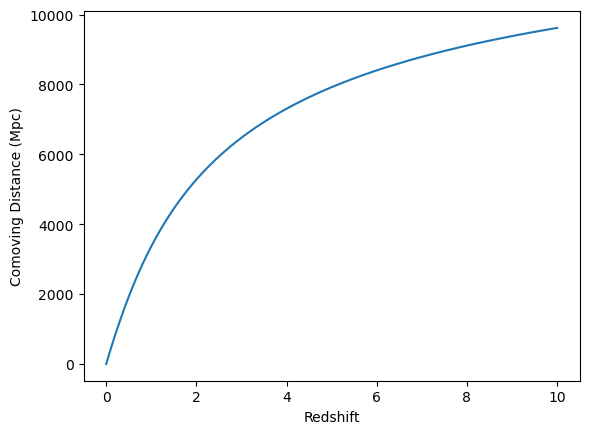

In [3]:
z = np.linspace(0,10,100)
plt.plot(z,c.dc_z(z)/Mpc)
plt.xlabel('Redshift')
plt.ylabel('Comoving Distance (Mpc)')
plt.show()

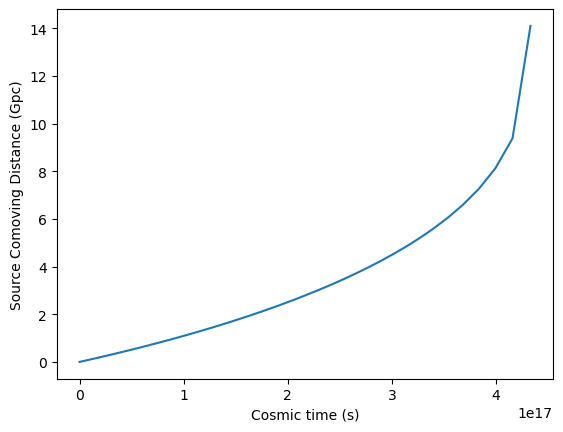

In [4]:
t = np.logspace(0.,np.log10(c.t0*.99999),1000)
dd = c.dc_t(t)

plt.plot(t,dd/Gpc)
plt.xlabel('Cosmic time (s)')
plt.ylabel('Source Comoving Distance (Gpc)')
plt.show()

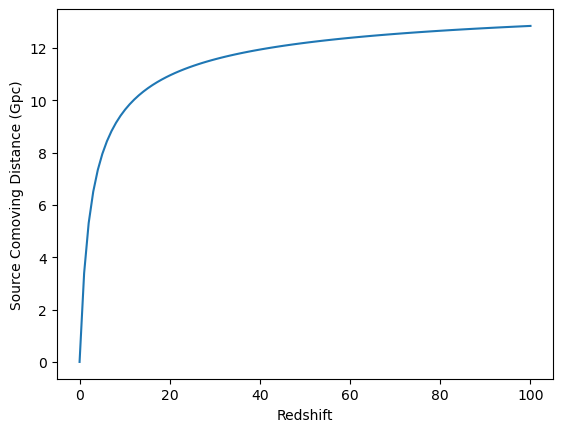

In [5]:
z = np.linspace(0.0001,100.,100)
dd = c.dc_z(z)

plt.plot(z,dd/Gpc)
plt.xlabel('Redshift')
plt.ylabel('Source Comoving Distance (Gpc)')
plt.show()

## Cosmological evolution

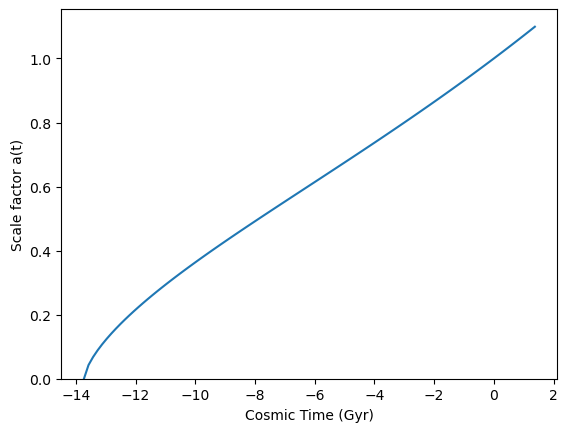

In [6]:
t = np.linspace(-c.t0,c.t0/10,100)
plt.plot(t/(1.e9*year),c.a_t(t))
plt.xlabel("Cosmic Time (Gyr)")
plt.ylabel("Scale factor a(t)")
plt.ylim(0,)
plt.show()

## Precision tests
### 1- Go from time to scale factor and go back to time

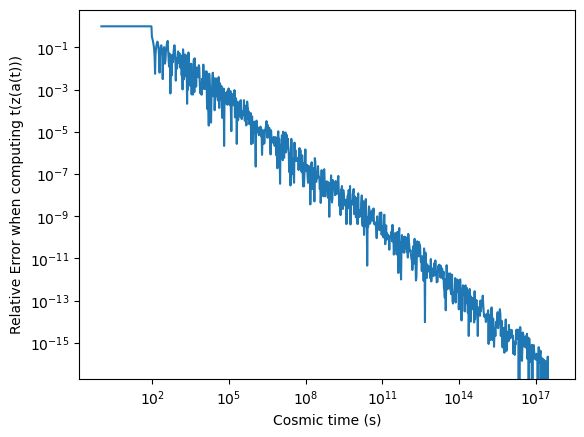

In [7]:
t = -np.logspace(np.log10(c.t0*.99999),1.e-2,1000)
tt = c.t_a((c.a_t(t)))

plt.plot(abs(t),abs((tt-t)/t))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Cosmic time (s)')
plt.ylabel('Relative Error when computing t(z(a(t)))')
plt.show()

### 2- Go from t to Dc and back. And the other way around

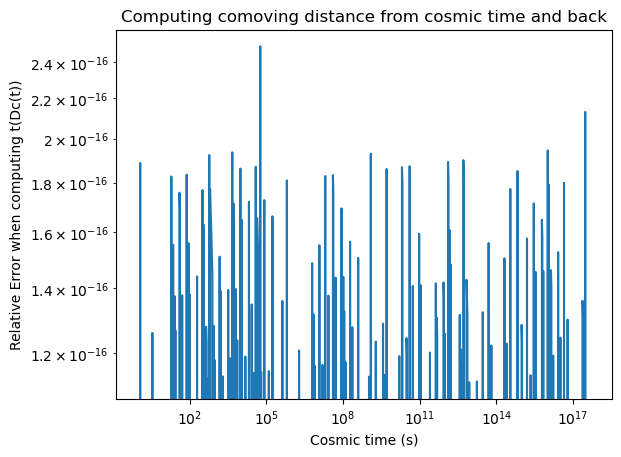

AttributeError: 'LCDM' object has no attribute 'Dc_t'

In [8]:
t = np.logspace(0.,np.log10(c.t0*.99999),1000)
dd = c.dc_t(t)
tt = c.t_dc(dd)
plt.plot(t,abs(tt-t)/t)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Cosmic time (s)')
plt.ylabel('Relative Error when computing t(Dc(t))')
plt.title('Computing comoving distance from cosmic time and back')
plt.show()

Dc = np.logspace(np.log10(1.*kpc),np.log10(14.*Gpc),100)
dd = c.Dc_t(c.t_Dc(Dc))
plt.plot(Dc/Gpc,abs(Dc-dd)/Dc)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Comoving distance (Gpc)')
plt.ylabel('Relative Error when computing Dc(t(Dc))')
plt.title('Computing cosmic time from comoving distance and back')
plt.show()

### Go from z to Dc and back. And the othere way around.

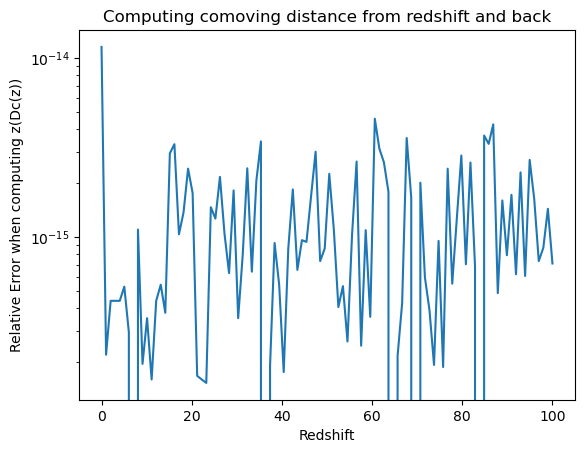

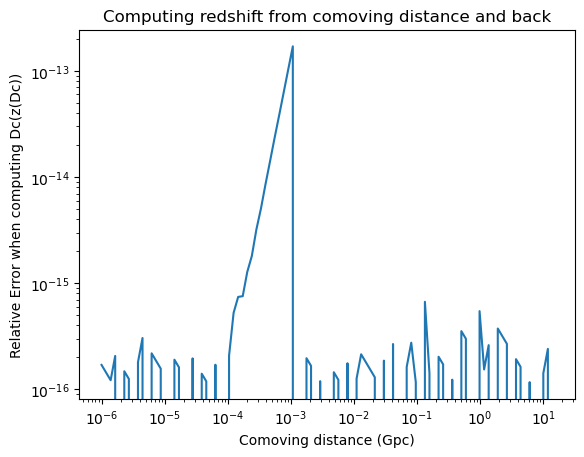

In [9]:
z = np.linspace(0.0001,100.,100)

dd = c.dc_z(z)
zz = c.z_dc(dd)

plt.plot(z,abs(zz-z)/z)
plt.yscale('log')
plt.xlabel('Redshift')
plt.ylabel('Relative Error when computing z(Dc(z))')
plt.title('Computing comoving distance from redshift and back')
plt.show()

Dc = np.logspace(np.log10(1.*kpc),np.log10(14.*Gpc),100)
dd = c.dc_z(c.z_dc(Dc))
plt.plot(Dc/Gpc,abs(Dc-dd)/Dc)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Comoving distance (Gpc)')
plt.ylabel('Relative Error when computing Dc(z(Dc))')
plt.title('Computing redshift from comoving distance and back')
plt.show()


### Go from a to Dc and back. And the other way around.

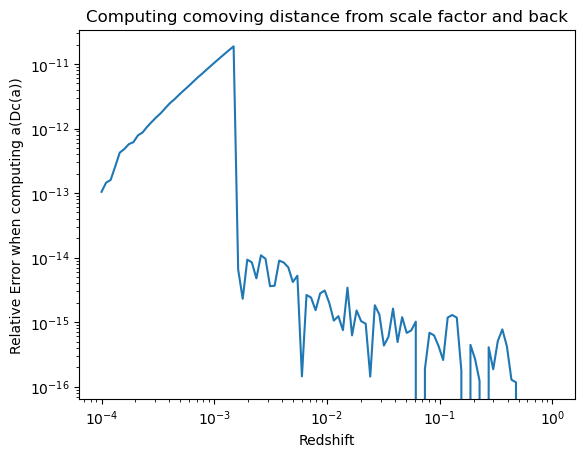

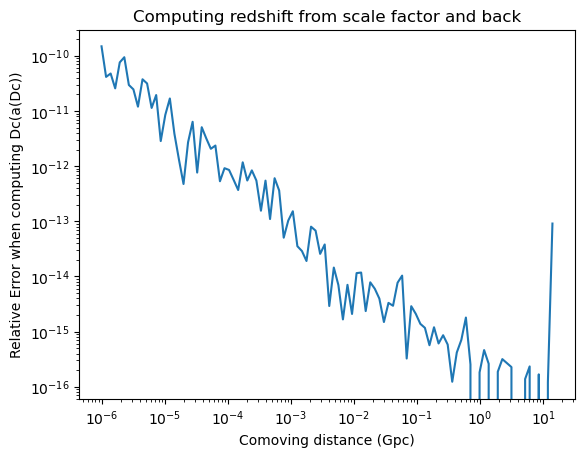

In [10]:
a = np.logspace(-4,0.,100)

dd = c.dc_a(a)
aa = c.a_dc(dd)
plt.plot(a,abs(aa-a)/a)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Redshift')
plt.ylabel('Relative Error when computing a(Dc(a))')
plt.title('Computing comoving distance from scale factor and back')
plt.show()

Dc = np.logspace(np.log10(1.*kpc),np.log10(14.*Gpc),100)
dd = c.dc_a(c.a_dc(Dc))
plt.plot(Dc/Gpc,abs(Dc-dd)/Dc)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Comoving distance (Gpc)')
plt.ylabel('Relative Error when computing Dc(a(Dc))')
plt.title('Computing redshift from scale factor and back')
plt.show()